# Customer Segmentation

In [199]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import LabelEncoder
from scipy.stats import chi2_contingency

import seaborn as sns

In [160]:
train = pd.read_csv("data/Segmentation_Train.csv")
test = pd.read_csv("data/Segmentation_Test.csv")

In [161]:
train.head()
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     7928 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        7990 non-null   object 
 5   Profession       7944 non-null   object 
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      7733 non-null   float64
 9   Var_1            7992 non-null   object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB


## Preprocessing data

In [162]:
columns = train.columns
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     7928 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        7990 non-null   object 
 5   Profession       7944 non-null   object 
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      7733 non-null   float64
 9   Var_1            7992 non-null   object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB


In [163]:
# column description
col_desc = {}
for col in columns[1:]:
    if train[col].dtype==object:
        col_desc[col] = {"category": train[col].unique(), "null": train[col].isnull().values.any()}
    else:
        col_desc[col] = {"max": max(train[col]), "min":min(train[col]), "null": train[col].isnull().values.any()}

In [164]:
col_desc

{'Gender': {'category': array(['Male', 'Female'], dtype=object),
  'null': False},
 'Ever_Married': {'category': array(['No', 'Yes', nan], dtype=object),
  'null': True},
 'Age': {'max': 89, 'min': 18, 'null': False},
 'Graduated': {'category': array(['No', 'Yes', nan], dtype=object),
  'null': True},
 'Profession': {'category': array(['Healthcare', 'Engineer', 'Lawyer', 'Entertainment', 'Artist',
         'Executive', 'Doctor', 'Homemaker', 'Marketing', nan], dtype=object),
  'null': True},
 'Work_Experience': {'max': 14.0, 'min': 0.0, 'null': True},
 'Spending_Score': {'category': array(['Low', 'Average', 'High'], dtype=object),
  'null': False},
 'Family_Size': {'max': 9.0, 'min': 1.0, 'null': True},
 'Var_1': {'category': array(['Cat_4', 'Cat_6', 'Cat_7', 'Cat_3', 'Cat_1', 'Cat_2', nan, 'Cat_5'],
        dtype=object),
  'null': True},
 'Segmentation': {'category': array(['D', 'A', 'B', 'C'], dtype=object),
  'null': False}}

In [222]:
# HeatMap Observations
train.shape

(8068, 11)

In [166]:
df = train.iloc[:,1:].dropna()
df.shape

(6665, 10)

In [183]:
global encoding_dict
encoding_dict = {} # to store encoding of categorical variables

def encode(column_name, df=df):
    """
    params:
    - column_name (str): name of column to be encoded
    - df (dataframe): dataframe after preprocessing

    does: encodes a column of the dataframe (df)

    return (numpy.ndarray): encoded column
    """
    global encoding_dict
    
    le= LabelEncoder()
    encoded_column = le.fit_transform(df[column_name])
    classes_= le.transform(le.classes_)
    col_dict ={}
    for cat, code in zip(le.classes_, classes_):
        col_dict[cat] = code
    encoding_dict[column_name] = col_dict
    return encoded_column

print(encoding_dict)


{}


In [184]:
df.columns

Index(['Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession',
       'Work_Experience', 'Spending_Score', 'Family_Size', 'Var_1',
       'Segmentation'],
      dtype='object')

In [185]:
# creating a new encoded dataframe
encoded_df = df[["Age","Work_Experience","Family_Size"]] # adding numerical columns
encoded_df.head()

,Age,Work_Experience,Family_Size
0,22,1.0,4.0
2,67,1.0,1.0
3,67,0.0,2.0
5,56,0.0,2.0
6,32,1.0,3.0


In [ ]:
# encode categorical columns and add them to the encoded dataframe
column_names = ["Gender", 'Ever_Married', 'Graduated', 'Profession', 'Spending_Score', 'Var_1', 'Segmentation']
for column_name in column_names:
    encoded_df[column_name] = encode(column_name)

In [188]:
# encoding dictionary
print(encoding_dict)

{'Gender': {'Female': 0, 'Male': 1}, 'Ever_Married': {'No': 0, 'Yes': 1}, 'Graduated': {'No': 0, 'Yes': 1}, 'Profession': {'Artist': 0, 'Doctor': 1, 'Engineer': 2, 'Entertainment': 3, 'Executive': 4, 'Healthcare': 5, 'Homemaker': 6, 'Lawyer': 7, 'Marketing': 8}, 'Spending_Score': {'Average': 0, 'High': 1, 'Low': 2}, 'Var_1': {'Cat_1': 0, 'Cat_2': 1, 'Cat_3': 2, 'Cat_4': 3, 'Cat_5': 4, 'Cat_6': 5, 'Cat_7': 6}, 'Segmentation': {'A': 0, 'B': 1, 'C': 2, 'D': 3}}


In [187]:
encoded_df

,Age,Work_Experience,Family_Size,Gender,Ever_Married,Graduated,Profession,Spending_Score,Var_1,Segmentation
0,22,1.0,4.0,1,0,0,5,2,3,3
2,67,1.0,1.0,0,1,1,2,2,5,1
3,67,0.0,2.0,1,1,1,7,1,5,1
5,56,0.0,2.0,1,1,0,0,0,5,2
6,32,1.0,3.0,1,0,1,5,2,5,2
...,...,...,...,...,...,...,...,...,...,...
8062,41,0.0,5.0,1,1,1,0,1,5,1
8064,35,3.0,4.0,1,0,0,4,2,3,3
8065,33,1.0,1.0,0,0,1,5,2,5,3
8066,27,1.0,4.0,0,0,1,5,2,5,1


<Axes: >

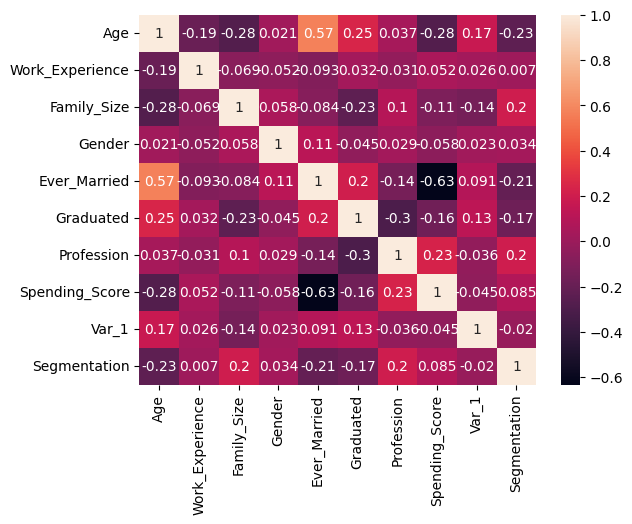

In [193]:
# heatmap
sns.heatmap(encoded_df.corr(method='pearson'), annot=True) #spearman, kendall

<Axes: >

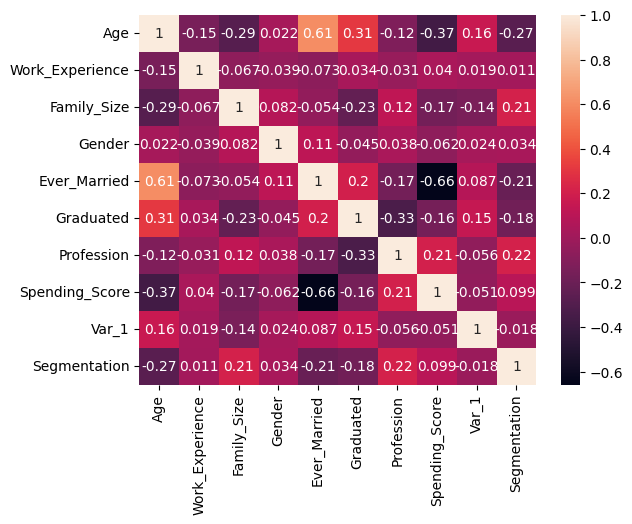

In [195]:
# heatmap
sns.heatmap(encoded_df.corr(method='spearman'), annot=True)

1. Married customers and Spending score are highly correlated to eachother
2. Age is correlated to marriage and graduation
3. Var_1 has extremely low correlation with other variables

In [208]:
# cramer's
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

def cramer_correlation_matrix(df):
    columns = df.select_dtypes(include='object').columns
    corr_matrix = pd.DataFrame(index=columns, columns=columns, dtype=float)
    for col1 in columns:
        for col2 in columns:
            if col1 != col2:
                corr = cramers_v(df[col1], df[col2])
                corr_matrix.loc[col1, col2] = corr
    return corr_matrix

In [219]:
df.drop(columns=["Age","Work_Experience","Family_Size"])

,Gender,Ever_Married,Graduated,Profession,Spending_Score,Var_1,Segmentation
0,Male,No,No,Healthcare,Low,Cat_4,D
2,Female,Yes,Yes,Engineer,Low,Cat_6,B
3,Male,Yes,Yes,Lawyer,High,Cat_6,B
5,Male,Yes,No,Artist,Average,Cat_6,C
6,Male,No,Yes,Healthcare,Low,Cat_6,C
...,...,...,...,...,...,...,...
8062,Male,Yes,Yes,Artist,High,Cat_6,B
8064,Male,No,No,Executive,Low,Cat_4,D
8065,Female,No,Yes,Healthcare,Low,Cat_6,D
8066,Female,No,Yes,Healthcare,Low,Cat_6,B


In [221]:
# Calculate Cramér's V correlation matrix
cramer_matrix = cramer_correlation_matrix(df.drop(columns=["Age","Work_Experience","Family_Size"]))
cramer_matrix

,Gender,Ever_Married,Graduated,Profession,Spending_Score,Var_1,Segmentation
Gender,NaN,0.113914,0.043251,0.359542,0.067395,0.040198,0.040793
Ever_Married,0.113914,NaN,0.202314,0.510865,0.678018,0.106131,0.426973
Graduated,0.043251,0.202314,NaN,0.410020,0.163844,0.216397,0.370478
Profession,0.359542,0.510865,0.410020,NaN,0.452091,0.107263,0.337046
Spending_Score,0.067395,0.678018,0.163844,0.452091,NaN,0.066142,0.316844
Var_1,0.040198,0.106131,0.216397,0.107263,0.066142,NaN,0.097011
Segmentation,0.040793,0.426973,0.370478,0.337046,0.316844,0.097011,NaN


In [ ]:
# Handling null values
def find_avg(column_queried):
    return int(sum(column_queried)/len(column_queried))

# Married female average age
column_queried = train.loc[(train["Ever_Married"]=="Yes") & (train["Gender"]=="Female"),"Age"]
age_avg_F= find_avg(column_queried)

# Married male average age
column_queried = train.loc[(train["Ever_Married"]=="Yes") & (train["Gender"]=="Male"),"Age"]
age_avg_M= find_avg(column_queried)

print(age_avg_F, age_avg_M) # Average age for both male and femae=le turned out to be 51

# Replace Married to "Yes" if age is 51 or higher
train.loc[train["Age"]>50,"Ever_Married"].fillna("Yes", inplace = True)
train["Ever_Married"].fillna("No", inplace = True)

# Replace Graduated, Profession with forward fill
train["Graduated"].fillna(method="ffill", inplace = True)
train["Profession"].fillna(method="ffill", inplace = True)

# Replace work experience, family size with average values
column_queried = train["Work_Experience"].dropna()
train["Work_Experience"].fillna(find_avg(column_queried), inplace = True)

column_queried = train["Family_Size"].dropna()
train["Family_Size"].fillna(find_avg(column_queried), inplace = True)

In [234]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     8068 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        8068 non-null   object 
 5   Profession       8068 non-null   object 
 6   Work_Experience  8068 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      8068 non-null   float64
 9   Var_1            7992 non-null   object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB


In [53]:
"""
EAD:
- Majority customers belong to which age group? - DONE
- Majority customers belong to which profession? - DONE
- Customer are male or female? - DONE
- Customers are educated or not? - DONE
- Customers are married or not? - DONE
- Majority customers have how many years of work experience? - DONE
- Spending score correlation with
    - work experience
    - profession
    - family size
    - var_1
 """

'\nEAD:\n- Majority customers belong to which age group? - DONE\n- Majority customers belong to which profession? - DONE\n- Customer are male or female? - DONE\n- Customers are educated or not? - DONE\n- Customers are married or not? - DONE\n- Majority customers have how many years of work experience? - DONE\n- Spending score correlation with\n    - work experience\n    - profession\n    - family size\n    - var_1\n\nHeatMap Observations:\n\n '